# Ressources
- Page GitHub du projet Data for Good
https://github.com/dataforgoodfr/bechdelai
- Documentation de l'API 
https://bechdeltest.com/api/v1/doc#getMovieByImdbId
- Licence à citer dans README
CC BY-NC 3.0 (https://creativecommons.org/licenses/by-nc/3.0/)
Attribution-NonCommercial 3.0 Unported

# Étape 1 : Préparation et Importation des Données

In [19]:
# 1. Importer les bibliothèques nécessaires

import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Récupérer les données à partir de l'API

link = 'http://bechdeltest.com/api/v1/getAllMovies'


# Effectuer la requête GET

r = requests.get(link)


# Vérifier que la requête a réussi (code HTTP 200)
if r.status_code == 200:
    # Récupérer la réponse JSON
    data = r.json()

    print(f"Statut HTTP: {r.status_code}")
    print("Contenu de la réponse :", r.text)

# Enregistrer la réponse JSON dans un fichier
    file = '..\gitignore\dataforgood_bechdelai.json'
    with open(file, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

    print("Données enregistrées dans 'gitignore\dataforgood_bechdelai.json'")
else:
    print(f"Erreur lors de la requête : {response.status_code}")



<>:20: SyntaxWarning: invalid escape sequence '\g'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\g'
<>:24: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vieas\AppData\Local\Temp\ipykernel_12432\4173097494.py:20: SyntaxWarning: invalid escape sequence '\g'
  file = '..\gitignore\dataforgood_bechdelai.json'
C:\Users\vieas\AppData\Local\Temp\ipykernel_12432\4173097494.py:24: SyntaxWarning: invalid escape sequence '\d'
  print("Données enregistrées dans 'gitignore\dataforgood_bechdelai.json'")


Statut HTTP: 200
Contenu de la réponse : [{"year":1874,"title":"Passage de Venus","id":9602,"imdbid":"3155794","rating":0},{"rating":0,"year":1877,"title":"La Rosace Magique","id":9804,"imdbid":"14495706"},{"title":"Sallie Gardner at a Gallop","imdbid":"2221420","id":9603,"year":1878,"rating":0},{"year":1878,"imdbid":"12592084","title":"Le singe musicien","id":9806,"rating":0},{"rating":0,"year":1881,"title":"Athlete Swinging a Pick","imdbid":"7816420","id":9816},{"rating":0,"year":1883,"title":"Buffalo Running","imdbid":"5459794","id":9831},{"id":9832,"title":"L&#39;homme machine","imdbid":"8588366","year":1885,"rating":0},{"rating":0,"year":1887,"title":"Man Walking Around the Corner","imdbid":"2075247","id":9614},{"year":1887,"title":"Cockatoo Flying","id":9836,"imdbid":"8133192","rating":0},{"title":"Child Carrying Flowers to Woman","imdbid":"7411790","id":9837,"year":1887,"rating":0},{"title":"Jumping Over a Man&#39;s Back-Leapfrog","id":9838,"imdbid":"7541160","year":1887,"rating

In [8]:
# Etape pour reprendre après déconnexion (pas besoin de refaire la requête API)

# Charger les données depuis le fichier JSON
with open(file, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Afficher les données JSON pour voir leur structure
display(data)

# Transformer l'objet JSON en dataframe
data = pd.json_normalize(data)

display(data)


[{'year': 1874,
  'title': 'Passage de Venus',
  'id': 9602,
  'imdbid': '3155794',
  'rating': 0},
 {'rating': 0,
  'year': 1877,
  'title': 'La Rosace Magique',
  'id': 9804,
  'imdbid': '14495706'},
 {'title': 'Sallie Gardner at a Gallop',
  'imdbid': '2221420',
  'id': 9603,
  'year': 1878,
  'rating': 0},
 {'year': 1878,
  'imdbid': '12592084',
  'title': 'Le singe musicien',
  'id': 9806,
  'rating': 0},
 {'rating': 0,
  'year': 1881,
  'title': 'Athlete Swinging a Pick',
  'imdbid': '7816420',
  'id': 9816},
 {'rating': 0,
  'year': 1883,
  'title': 'Buffalo Running',
  'imdbid': '5459794',
  'id': 9831},
 {'id': 9832,
  'title': 'L&#39;homme machine',
  'imdbid': '8588366',
  'year': 1885,
  'rating': 0},
 {'rating': 0,
  'year': 1887,
  'title': 'Man Walking Around the Corner',
  'imdbid': '2075247',
  'id': 9614},
 {'year': 1887,
  'title': 'Cockatoo Flying',
  'id': 9836,
  'imdbid': '8133192',
  'rating': 0},
 {'title': 'Child Carrying Flowers to Woman',
  'imdbid': '741179

,year,title,id,imdbid,rating
0,1874,Passage de Venus,9602,3155794,0
1,1877,La Rosace Magique,9804,14495706,0
2,1878,Sallie Gardner at a Gallop,9603,2221420,0
3,1878,Le singe musicien,9806,12592084,0
4,1881,Athlete Swinging a Pick,9816,7816420,0
...,...,...,...,...,...
10403,2024,I Saw The TV Glow,11454,15574270,3
10404,2024,Dan Da Dan: First Encounter,11456,33343397,3
10405,2024,"Queen of Villains, The",11458,21187072,3
10406,2024,"Substance, The",11459,17526714,1


In [9]:
# 3. Aperçu initial des données :

print(data.head())  # Affiche les 5 premières lignes
print(data.info())  # Donne des informations sur les types de colonnes et les valeurs manquantes
print(data.describe())  # Statistiques descriptives basiques (numériques uniquement)

   year                       title    id    imdbid  rating
0  1874            Passage de Venus  9602   3155794       0
1  1877           La Rosace Magique  9804  14495706       0
2  1878  Sallie Gardner at a Gallop  9603   2221420       0
3  1878           Le singe musicien  9806  12592084       0
4  1881     Athlete Swinging a Pick  9816   7816420       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10408 entries, 0 to 10407
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    10408 non-null  int64 
 1   title   10408 non-null  object
 2   id      10408 non-null  int64 
 3   imdbid  10408 non-null  object
 4   rating  10408 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 406.7+ KB
None
               year            id        rating
count  10408.000000  10408.000000  10408.000000
mean    1996.969447   5564.635953      2.136434
std       25.072709   3262.875552      1.099030
min     1874.000000      1.0000

# Étape 2 : Inspection des Données

In [10]:
# 1. Vérification des dimensions :

print(data.shape)  # Nombre de lignes et de colonnes

# 2. Recherche des valeurs manquantes :

print(f"Valeurs manquantes : {data.isnull().sum()}")  # Total des valeurs manquantes par colonne
print(f"Valeurs manquantes : {data.isna().sum()}")  # Total des valeurs manquantes par colonne

(10408, 5)
Valeurs manquantes : year      0
title     0
id        0
imdbid    0
rating    0
dtype: int64
Valeurs manquantes : year      0
title     0
id        0
imdbid    0
rating    0
dtype: int64


In [ ]:
# 3. Identification des doublons :

# Doublons de lignes entières
print(data.duplicated().sum())  # Nombre de lignes dupliquées

0


In [47]:
# Doublons sur identifiants : 
print(f"Valeurs uniques : {data["imdbid"].unique()}")
print(f"Nombre de ligne par valeur : {data["imdbid"].value_counts()}")

# Récupérer les valeurs pour lesquelles value_counts == 2
imdbid_counts = data["imdbid"].value_counts()
imdbid_with_two_occurrences = imdbid_counts[imdbid_counts >= 2].index.tolist()

# Afficher la liste des valeurs correspondantes
print(f"Liste des valeurs apparaissant 2 fois ou plus : {imdbid_with_two_occurrences}")

Valeurs uniques : ['3155794' '14495706' '2221420' ... '21187072' '17526714' '27489557']
Nombre de ligne par valeur : imdbid
2457282     2
0117056     2
0086425     2
2043900     2
0035279     2
           ..
0119115     1
0118826     1
0118866     1
0118829     1
27489557    1
Name: count, Length: 10402, dtype: int64
Liste des valeurs apparaissant 2 fois ou plus : ['2457282', '0117056', '0086425', '2043900', '0035279', '']


In [ ]:
# Focus sur les lignes avec id identique

focus = data[data["imdbid"]=="2457282"]
print(focus)
print(focus["title"][7511])
print(focus["title"][7523])

      year                                              title    id   imdbid  \
7511  2013  Puella Magi Madoka Magica the Movie Part III: ...  4980  2457282   
7523  2013                     Madoka Magica: Rebellion Story  5026  2457282   

      rating  
7511       3  
7523       3  
Puella Magi Madoka Magica the Movie Part III: The Rebellion Story
Madoka Magica: Rebellion Story


In [48]:
# Focus sur les lignes avec id ''

focus = data[data["imdbid"]==""]
print(focus)

       year                  title     id imdbid  rating
5846   2008                 Machan  11315              1
10383  2024  A Little Family Drama  11379              3


## Actions à mettre en oeuvre
- supprimer les doublons d'imdbid
- supprimer les lignes qui ont un imdbid = ''

In [49]:
# Supprimer les doublons (garder la première occurrence uniquement)

data_without_duplicates = data.drop_duplicates(subset="imdbid", keep='first')

# Étape 3 : Analyse des Variables

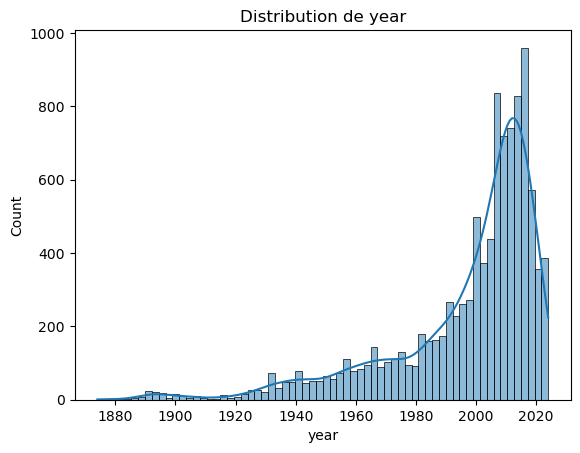

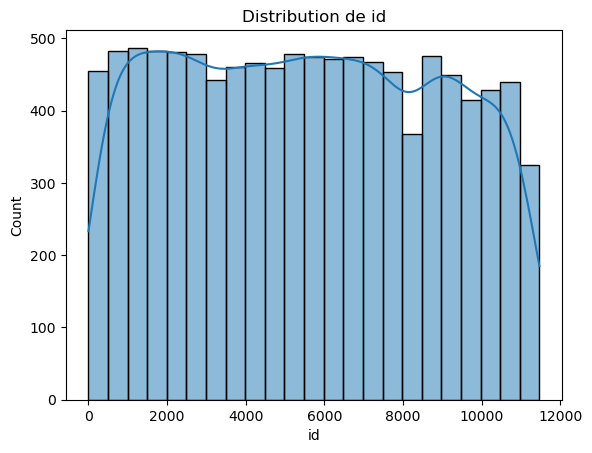

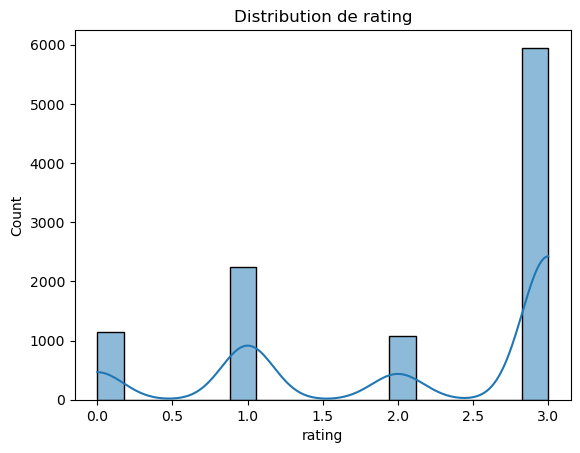

In [20]:
# 2. Variables numériques :

# Statistiques de base et distribution :

for col in data.select_dtypes(include=['int64', 'float64']):
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()

In [50]:
# Exporter en CSV

data_without_duplicates.to_csv('../gitignore/data_bechdel.csv', index=False, encoding='utf-8')